## Exploratory Data Analysis


In [1]:
import os
import psycopg2
import pandas as pd 
#from pandas_profiling import ProfileReport
#import pandas_profiling as pp  
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

In [18]:
#directly extract the data for arr-delay from the SQL
arr_delay=pd.read_sql_query("SELECT fl_date,dep_delay,arr_delay FROM flights where arr_delay is not NUll",con=con)

In [19]:
arr_delay.to_csv('delay.csv')

In [5]:
arr_delay.head()

,fl_date,dep_delay,arr_delay
0,2019-04-01,-11.0,-6.0
1,2019-04-01,-7.0,-8.0
2,2019-04-01,-7.0,-15.0
3,2019-04-01,-3.0,-4.0
4,2019-04-01,-8.0,-13.0


In [6]:
arr_delay.describe()

,dep_delay,arr_delay
count,1.561115e+07,1.561574e+07
mean,1.047690e+01,5.475932e+00
std,4.763297e+01,4.987401e+01
min,-1.280000e+03,-1.290000e+03
25%,-6.000000e+00,-1.500000e+01
50%,-2.000000e+00,-6.000000e+00
75%,7.000000e+00,8.000000e+00
max,2.976000e+03,2.973000e+03


In [2]:
dp=pd.read_csv('passengers.csv')


(2350497, 38)

In [3]:
#fuel data 
d_fuel=pd.read_csv('fuel.csv')

In [14]:
# getting each table profilling report
prof=pp.ProfileReport(df)
#prof.to_file('flights.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [5]:
data=pd.read_csv('flights.csv', skiprows=lambda i: i % 100!= 0)

In [192]:
w=data[data['weather_delay']>0]
w.to_csv('weather_delay.csv')

In [4]:
df=data[data['arr_delay'].notnull()]

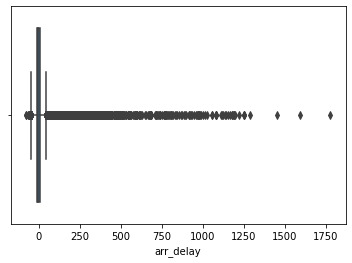

In [305]:
# box plot for arr-delay time
sns.boxplot(df['arr_delay'])

(-100.0, 100.0)

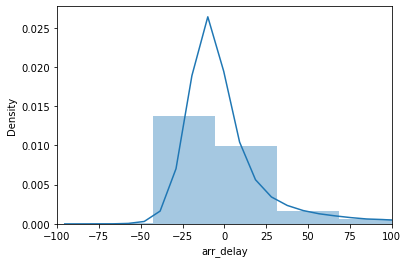

In [306]:
#arrive_delay
sns.distplot(df['arr_delay'])
plt.xlim(-100,100)


In [310]:
# use the shapiro test, the P_value is 0, therefore it is not normalized distribution 
from scipy.stats import norm, shapiro

my_data = df['arr_delay']
shapiro(my_data)
#print(ks_statistic, p_value)

ShapiroResult(statistic=0.4650823473930359, pvalue=0.0)

In [6]:
df['arr_delay'].describe()

count    98120.000000
mean         5.396647
std         50.966146
min        -80.000000
25%        -15.000000
50%         -6.000000
75%          8.000000
max       1779.000000
Name: arr_delay, dtype: float64

In [11]:
#identify outliers
Q1=dfdelay.quantile(0.25)
Q3=dfdelay.quantile(0.75)
IQR=Q3-Q1
Lower_bound=Q1-1.5*IQR
Upper_bound=Q3+1.5*IQR
print(Lower_bound,Upper_bound)

-49.5 42.5


In [25]:
delay=df[df['arr_delay'].between(-50,50)]

In [27]:
delay['arr_delay'].describe()

count    90504.000000
mean        -4.694212
std         16.502058
min        -50.000000
25%        -16.000000
50%         -8.000000
75%          3.000000
max         50.000000
Name: arr_delay, dtype: float64

In [19]:
from scipy.stats import norm, shapiro   #  remove the outlier but still P value is 0. So it is not a normal distribution based on Shapiro test 
my_data = delay['arr_delay']
shapiro(my_data)


ShapiroResult(statistic=0.950928270816803, pvalue=0.0)

### pvalue=0, We have sufficient evidence to say that the sample data does not come from a normal distribution.

In [20]:
df_delay=arr_delay[arr_delay['arr_delay']>0]


In [19]:
df_delay.shape

(5475609, 3)

### reading fuel data from SQL, and creating the pandas profiling report 

In [23]:
#df_fuel=pd.read_sql_query("SELECT * FROM fuel_comsumption",con=con)
#df_fuel.head()


,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,None,0JQ,None,1,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,0.0,0.0,163052.0,47060.0,210112.0,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,0.0,260848.0,284362.0,0.0,284362.0,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016


In [26]:
#fuel=pp.ProfileReport(df_fuel)
#fuel.to_file('fuel.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]


### reading Passengers table and    creating pandas profiling report for further exploration

In [29]:
# passenger=pp.ProfileReport(dp)
# passenger.to_file('passenger.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


In [26]:
df_test=pd.read_sql_query("Select * from flights_test",con=con)
df_test.to_csv('test_data')

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason? 
### based on average month delay count and the average delay time --there are higher monthly delay in June-August

In [1]:
# create the month column
# df_delay['month']=pd.DatetimeIndex(df_delay['fl_date']).month
# df_delay.head()


In [21]:
delay_month=df_delay.groupby(['month'])['arr_delay'].count().reset_index()
delay_month

,month,arr_delay
0,1,409076
1,2,418572
2,3,441232
3,4,431428
4,5,477611
5,6,536216
6,7,518368
7,8,518692
8,9,376302
9,10,445570


In [24]:
delay_average=df_delay.groupby(['month'])['arr_delay'].mean().reset_index()
delay_average  

,month,arr_delay
0,1,40.395885
1,2,41.437232
2,3,34.765450
3,4,38.616274
4,5,41.257934
5,6,44.650947
6,7,45.244490
7,8,44.850802
8,9,37.519686
9,10,34.678836


Text(0.5, 1.0, 'flight delay counts on different months')

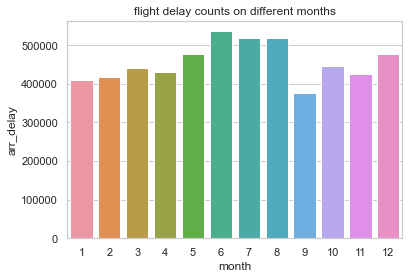

In [22]:
# create the bar chart 
sns.set_theme(style='whitegrid')
ax=sns.barplot(x='month', y='arr_delay', data=delay_month)
ax.set_title('flight delay counts on different months')


Text(0.5, 1.0, 'flight average delay time on different months')

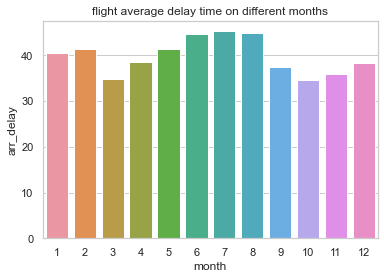

In [25]:
sns.set_theme(style='whitegrid')
ax=sns.barplot(x='month', y='arr_delay', data=delay_average)
ax.set_title('flight average delay time on different months')

###  **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [194]:
w['fl_date']=pd.to_datetime(w['fl_date'])
w['fl_year']=w['fl_date'].dt.year 
w['fl_month']=w['fl_date'].dt.month

In [195]:
weather_data=w[['fl_date','fl_year', 'fl_month', 'origin_city_name','dest_city_name','dep_time','dep_delay','arr_time','arr_delay','weather_delay']]

In [196]:
weather_data['origin_city']=weather_data['origin_city_name'].apply(lambda x: "".join(x.split(",")[0]))
weather_data['dest_city']=weather_data['dest_city_name'].apply(lambda x: "".join(x.split(",")[0]))

weather_data.head()

,fl_date,fl_year,fl_month,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,weather_delay,origin_city,dest_city
244,2018-03-27,2018,3,"Little Rock, AR","Dallas/Fort Worth, TX",1050.0,153.0,1221.0,146.0,146.0,Little Rock,Dallas/Fort Worth
351,2018-03-27,2018,3,"Dallas/Fort Worth, TX","Fayetteville, AR",2113.0,38.0,2222.0,32.0,32.0,Dallas/Fort Worth,Fayetteville
371,2018-03-27,2018,3,"Kahului, HI","Hilo, HI",1549.0,12.0,1633.0,18.0,6.0,Kahului,Hilo
459,2018-03-28,2018,3,"Shreveport, LA","Houston, TX",2014.0,254.0,2210.0,302.0,11.0,Shreveport,Houston
604,2018-03-28,2018,3,"Houston, TX","Mission/McAllen/Edinburg, TX",2213.0,23.0,2340.0,28.0,11.0,Houston,Mission/McAllen/Edinburg


In [197]:
dw=weather_data[weather_data['fl_year']==2019]
dl=dw.groupby(['fl_month','origin_city']).agg({'weather_delay':['count','mean','sum']}).reset_index()
dl.columns=["_".join(x) for x in dl.columns.ravel()]

In [198]:
dl.head()

,fl_month_,origin_city_,weather_delay_count,weather_delay_mean,weather_delay_sum
0,1,Appleton,1,19.0,19.0
1,1,Atlanta,2,50.0,100.0
2,1,Baltimore,1,2.0,2.0
3,1,Baton Rouge,1,64.0,64.0
4,1,Bemidji,1,366.0,366.0


In [96]:
dl['origin_city_'].value_counts()

Chicago                  7
Minneapolis              6
Houston                  6
Detroit                  6
Dallas/Fort Worth        6
                        ..
Tyler                    1
Greensboro/High Point    1
Harlingen/San Benito     1
Lafayette                1
San Francisco            1
Name: origin_city_, Length: 130, dtype: int64

In [103]:
hous=dl[dl['origin_city_']=='Houston']

In [106]:
hous.head()

,fl_month_,origin_city_,weather_delay_count,weather_delay_mean,weather_delay_sum
22,1,Houston,1,21.0,21.0
112,5,Houston,5,10.8,54.0
153,8,Houston,2,22.5,45.0
189,9,Houston,2,60.0,120.0
217,11,Houston,1,549.0,549.0


In [107]:
hous['fl_month_'].value_counts()

5     1
12    1
11    1
9     1
1     1
8     1
Name: fl_month_, dtype: int64

In [40]:
dl[dl['origin_city_']=='Chicago']

,fl_month_,origin_city_,weather_delay_count,weather_delay_mean,weather_delay_sum
8,1,Chicago,19,59.684211,1134.0
51,2,Chicago,15,18.533333,278.0
99,5,Chicago,6,31.833333,191.0
143,8,Chicago,5,15.000000,75.0
184,9,Chicago,7,153.142857,1072.0
209,11,Chicago,4,37.500000,150.0
240,12,Chicago,7,95.714286,670.0


In [199]:
# use weather API to extract the data for chicago
chicago=weather_data[(weather_data.origin_city=='Chicago') & (weather_data.fl_year==2019)]
chicago 

,fl_date,fl_year,fl_month,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,weather_delay,origin_city,dest_city
2856,2019-08-07,2019,8,"Chicago, IL","Meridian, MS",1613.0,6.0,1847.0,35.0,6.0,Chicago,Meridian
5343,2019-08-18,2019,8,"Chicago, IL","Rochester, NY",1030.0,125.0,1319.0,128.0,45.0,Chicago,Rochester
5423,2019-08-18,2019,8,"Chicago, IL","Raleigh/Durham, NC",2304.0,304.0,159.0,292.0,2.0,Chicago,Raleigh/Durham
5782,2019-08-20,2019,8,"Chicago, IL","Baltimore, MD",1239.0,14.0,1559.0,44.0,14.0,Chicago,Baltimore
7204,2019-08-26,2019,8,"Chicago, IL","New York, NY",1915.0,30.0,2229.0,23.0,8.0,Chicago,New York
...,...,...,...,...,...,...,...,...,...,...,...,...
98799,2019-05-27,2019,5,"Chicago, IL","Salt Lake City, UT",1527.0,112.0,1827.0,146.0,112.0,Chicago,Salt Lake City
98838,2019-05-27,2019,5,"Chicago, IL","Columbus, OH",1840.0,230.0,2104.0,239.0,3.0,Chicago,Columbus
98845,2019-05-27,2019,5,"Chicago, IL","Denver, CO",1859.0,58.0,2030.0,51.0,8.0,Chicago,Denver
99112,2019-05-28,2019,5,"Chicago, IL","New York, NY",2257.0,154.0,250.0,181.0,60.0,Chicago,New York


In [201]:
chicago.to_csv('chicago.csv')

In [202]:
chicago.head()

,fl_date,fl_year,fl_month,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,weather_delay,origin_city,dest_city
2856,2019-08-07,2019,8,"Chicago, IL","Meridian, MS",1613.0,6.0,1847.0,35.0,6.0,Chicago,Meridian
5343,2019-08-18,2019,8,"Chicago, IL","Rochester, NY",1030.0,125.0,1319.0,128.0,45.0,Chicago,Rochester
5423,2019-08-18,2019,8,"Chicago, IL","Raleigh/Durham, NC",2304.0,304.0,159.0,292.0,2.0,Chicago,Raleigh/Durham
5782,2019-08-20,2019,8,"Chicago, IL","Baltimore, MD",1239.0,14.0,1559.0,44.0,14.0,Chicago,Baltimore
7204,2019-08-26,2019,8,"Chicago, IL","New York, NY",1915.0,30.0,2229.0,23.0,8.0,Chicago,New York


In [42]:
chicago_time=chicago[['fl_date','fl_month','dep_time','weather_delay']]

In [48]:
chicago_time['fl_month'].value_counts()

1     19
2     15
12     7
9      7
5      6
8      5
11     4
Name: fl_month, dtype: int64

In [53]:
weather_data.head()

,fl_date,fl_year,fl_month,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,weather_delay,origin_city,dest_city
244,2018-03-27,2018,3,"Little Rock, AR","Dallas/Fort Worth, TX",1050.0,153.0,1221.0,146.0,146.0,Little Rock,Dallas/Fort Worth
351,2018-03-27,2018,3,"Dallas/Fort Worth, TX","Fayetteville, AR",2113.0,38.0,2222.0,32.0,32.0,Dallas/Fort Worth,Fayetteville
371,2018-03-27,2018,3,"Kahului, HI","Hilo, HI",1549.0,12.0,1633.0,18.0,6.0,Kahului,Hilo
459,2018-03-28,2018,3,"Shreveport, LA","Houston, TX",2014.0,254.0,2210.0,302.0,11.0,Shreveport,Houston
604,2018-03-28,2018,3,"Houston, TX","Mission/McAllen/Edinburg, TX",2213.0,23.0,2340.0,28.0,11.0,Houston,Mission/McAllen/Edinburg


In [83]:
w=w[w.Name=='chicago']
w=w[['Date time','Temperature','Wind Chill', 'Precipitation','Cloud Cover', 'Conditions']]

In [84]:
w['Date time']=pd.to_datetime(w['Date time'])
w

,Date time,Temperature,Wind Chill,Precipitation,Cloud Cover,Conditions
59,2019-01-01,30.6,16.6,0.00,4.4,Clear
60,2019-01-02,29.5,17.8,0.00,3.7,Clear
61,2019-01-03,32.4,16.1,0.00,0.6,Clear
62,2019-01-04,39.5,25.3,0.00,0.7,Clear
63,2019-01-05,42.4,26.9,0.00,1.6,Clear
...,...,...,...,...,...,...
26,2019-12-27,35.9,26.4,0.00,5.2,Clear
27,2019-12-28,37.1,26.1,0.17,5.8,Rain
28,2019-12-29,51.5,39.1,0.87,4.3,Rain
29,2019-12-30,34.5,15.8,0.08,5.8,Rain


In [86]:
w['Cloud Cover'].describe()

count    140.000000
mean       3.767143
std        3.788879
min        0.000000
25%        1.975000
50%        3.600000
75%        4.525000
max       29.700000
Name: Cloud Cover, dtype: float64

In [85]:
w['Conditions'].value_counts()

Clear                     80
Snow                      35
Rain                      24
Snow, Partially cloudy     1
Name: Conditions, dtype: int64

In [74]:
# merge the chicago_time with the w table
chi_weather_del=pd.merge(chicago_time, w, left_on='fl_date', right_on='Date time', how='left')

In [75]:
chi_weather_del.head(100)

,fl_date,fl_month,dep_time,weather_delay,Date time,Temperature,Wind Chill,Precipitation,Conditions
0,2019-08-07,8,1613.0,6.0,2019-08-07,76.6,NaN,0.0,Clear
1,2019-08-18,8,1030.0,45.0,2019-08-18,74.9,NaN,0.0,Clear
2,2019-08-18,8,2304.0,2.0,2019-08-18,74.9,NaN,0.0,Clear
3,2019-08-20,8,1239.0,14.0,2019-08-20,74.3,NaN,0.0,Clear
4,2019-08-26,8,1915.0,8.0,2019-08-26,71.2,NaN,0.0,Clear
...,...,...,...,...,...,...,...,...,...
58,2019-05-27,5,1527.0,112.0,2019-05-27,57.5,NaN,0.0,Clear
59,2019-05-27,5,1840.0,3.0,2019-05-27,57.5,NaN,0.0,Clear
60,2019-05-27,5,1859.0,8.0,2019-05-27,57.5,NaN,0.0,Clear
61,2019-05-28,5,2257.0,60.0,2019-05-28,57.9,42.8,0.0,Clear


In [77]:
chi_weather_del.groupby(['Conditions', 'fl_month']).agg({'weather_delay':['count', 'mean','sum']}).reset_index()

Conditions fl_month weather_delay                    
                               count        mean     sum
0       Clear        1             2   10.000000    20.0
1       Clear        2             1   38.000000    38.0
2       Clear        5             5   38.000000   190.0
3       Clear        8             5   15.000000    75.0
4       Clear        9             2   44.500000    89.0
5       Clear       12             4  131.750000   527.0
6        Rain        2             5   14.600000    73.0
7        Rain        9             5  196.600000   983.0
8        Rain       12             2   21.500000    43.0
9        Snow        1            17   65.529412  1114.0
10       Snow        2             9   18.555556   167.0
11       Snow       11             4   37.500000   150.0
12       Snow       12             1  100.000000   100.0

In [89]:
dw=chi_weather_del

In [90]:
w_clear=dw[dw.Conditions=='Clear'].weather_delay.values
w_snow=dw[dw.Conditions=='Snow'].weather_delay.values
w_rain=dw[dw.Conditions=='Rain'].weather_delay.values

In [188]:
import scipy.stats as stats   ## based on limited API weather data extracted for Chicago, it is inclusive that there are different weather delay times

stats.f_oneway(w_snow,w_rain, w_clear)


F_onewayResult(statistic=0.4710451375821504, pvalue=0.6266770392772169)

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?  (the taxi_out time has been used for analysis. And the taxi_out time are busier 8-10 AM and 5-7pm)

In [28]:
taxi=pd.read_sql_query("Select dep_time,taxi_out from flights where dep_time is not null and taxi_out is not null;",con=con)

In [29]:
taxi.head()

,dep_time,taxi_out
0,1544.0,15.0
1,1918.0,8.0
2,2118.0,11.0
3,457.0,6.0
4,2217.0,7.0


In [33]:
taxi.dtypes

dep_time    float64
taxi_out    float64
dtype: object

In [36]:
int(457/100)

4

In [42]:
taxi['hour']=pd.to_numeric(taxi['dep_time']/100, downcast='integer')

In [45]:
taxi['hour']=taxi['hour'].astype('int')

In [46]:
taxi.head()

,dep_time,taxi_out,hour
0,1544.0,15.0,15
1,1918.0,8.0,19
2,2118.0,11.0,21
3,457.0,6.0,4
4,2217.0,7.0,22


In [55]:
taxi_time=taxi.groupby(['hour']).taxi_out.mean().reset_index()

In [56]:
taxi_time.head()

,hour,taxi_out
0,0,15.834821
1,1,14.590983
2,2,13.392866
3,3,12.541478
4,4,14.508172


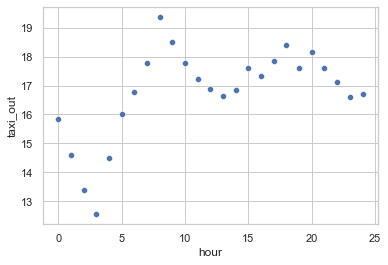

In [57]:
sns.scatterplot(x='hour', y='taxi_out', data=taxi_time)

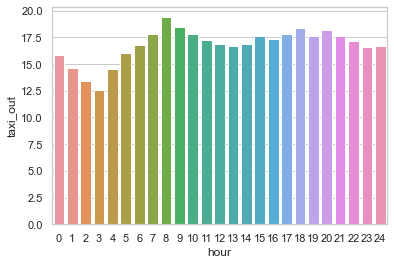

In [58]:
sns.barplot(x='hour', y='taxi_out', data=taxi_time)  #morning 8am and afternoon 6pm are the busy time

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?  ---71% of arr_delay had the departure delay

In [59]:
# extract dthe departure delay of the total arrive_delay data (df_delay)
df_delay.shape

(5475609, 4)

In [60]:
arrdelay=df_delay[df_delay.dep_delay>0]
arrdelay.shape

(3900977, 4)

In [62]:
print(f'The percentage of the departure_delay is {round(arrdelay.size/df_delay.size, 2)*100} percent')

The percentage of the departure_delay is 71.0 percent


In [65]:
dd=arrdelay.groupby(['month'])['dep_delay'].mean()

month
1     54.188913
2     53.777560
3     47.710645
4     52.027614
5     53.618541
6     56.160963
7     57.921632
8     57.149905
9     51.639321
10    47.622579
11    48.877580
12    50.879727
Name: dep_delay, dtype: float64

In [79]:
dd=arrdelay['dep_delay']  #dd-departure delay  #ad-arrive delay
ad=arrdelay['arr_delay']

In [82]:
ad.describe()

count    3.900977e+06
mean     5.186218e+01
std      8.138995e+01
min      1.000000e+00
25%      1.100000e+01
50%      2.700000e+01
75%      6.200000e+01
max      2.973000e+03
Name: arr_delay, dtype: float64

### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay?  --based on the Z-test, the actual elaspsed time and crs_elasped time have been used for hypothsis testing, and the P value is 0, so reject the null hypothtis (not faster) and confirm that the departure delay flight is flying faster. 

In [109]:
# select sample data to check the flight time 
s1=pd.read_sql_query("Select fl_date, dep_time,crs_dep_time, crs_elapsed_time,actual_elapsed_time, dep_delay,crs_arr_time, air_time,arr_time,arr_delay from flights ORDER BY RANDOM() LIMIT 100000;", con=con)

In [113]:
s1.head()

,fl_date,dep_time,crs_dep_time,crs_elapsed_time,actual_elapsed_time,dep_delay,crs_arr_time,air_time,arr_time,arr_delay
0,2018-08-23,527.0,530,56.0,50.0,-3.0,626,35.0,617.0,-9.0
1,2019-08-07,920.0,918,86.0,80.0,2.0,1044,46.0,1040.0,-4.0
2,2019-07-29,NaN,1704,198.0,NaN,NaN,2122,NaN,NaN,NaN
3,2019-07-23,759.0,730,164.0,155.0,29.0,1114,129.0,1134.0,20.0
4,2018-07-18,1708.0,1655,325.0,292.0,13.0,1920,279.0,1900.0,-20.0


In [110]:
dep_delay=s1[s1['dep_delay']>0]
dep_delay['fly_time_faster']=dep_delay['crs_elapsed_time']-dep_delay['actual_elapsed_time']
conditions=[(dep_delay['fly_time_faster']>0), (dep_delay['fly_time_faster']<=0)]
values=[1,0]
dep_delay['fly_faster']=np.select(conditions,values)


In [112]:
non_dep_delay=s1[s1['dep_delay']<=0]

In [122]:
# select fly_faster_data the data fly_faster
fly_faster_data=s1[(s1['actual_elapsed_time'])<(s1['crs_elapsed_time'])]

In [126]:
fly_faster_data.dropna(inplace=True)

In [128]:
fly_faster_data.head()

,fl_date,dep_time,crs_dep_time,crs_elapsed_time,actual_elapsed_time,dep_delay,crs_arr_time,air_time,arr_time,arr_delay
0,2018-08-23,527.0,530,56.0,50.0,-3.0,626,35.0,617.0,-9.0
1,2019-08-07,920.0,918,86.0,80.0,2.0,1044,46.0,1040.0,-4.0
3,2019-07-23,759.0,730,164.0,155.0,29.0,1114,129.0,1134.0,20.0
4,2018-07-18,1708.0,1655,325.0,292.0,13.0,1920,279.0,1900.0,-20.0
6,2019-07-18,1859.0,1906,173.0,168.0,-7.0,2359,150.0,2347.0,-12.0


In [138]:
dep=fly_faster_data[fly_faster_data['dep_delay']>0]

In [139]:
no_dep=fly_faster_data[(fly_faster_data['dep_delay']<=0)]

In [189]:
from scipy.stats import stats
stats.ttest_ind(dep['crs_elapsed_time'],no_dep['actual_elapsed_time'])

Ttest_indResult(statistic=32.966874963226346, pvalue=1.6348350140276002e-236)

In [137]:
no_dep

,fl_date,dep_time,crs_dep_time,crs_elapsed_time,actual_elapsed_time,dep_delay,crs_arr_time,air_time,arr_time,arr_delay
0,2018-08-23,527.0,530,56.0,50.0,-3.0,626,35.0,617.0,-9.0
6,2019-07-18,1859.0,1906,173.0,168.0,-7.0,2359,150.0,2347.0,-12.0
9,2019-10-05,859.0,900,66.0,62.0,-1.0,1006,25.0,1001.0,-5.0
11,2019-02-21,1133.0,1139,100.0,95.0,-6.0,1319,72.0,1308.0,-11.0
20,2018-03-02,2210.0,2215,84.0,76.0,-5.0,2339,55.0,2326.0,-13.0
...,...,...,...,...,...,...,...,...,...,...
99991,2019-07-03,722.0,726,321.0,303.0,-4.0,947,288.0,925.0,-22.0
99992,2019-10-14,1643.0,1647,100.0,91.0,-4.0,1927,76.0,1914.0,-13.0
99993,2019-02-05,830.0,832,165.0,156.0,-2.0,1017,128.0,1006.0,-11.0
99994,2018-06-04,853.0,900,154.0,145.0,-7.0,1134,127.0,1118.0,-16.0


In [140]:
from scipy.stats import ks_2samp

In [147]:
print(ks_2samp(dep['dep_delay'], no_dep['dep_delay']))

KstestResult(statistic=1.0, pvalue=0.0)


In [31]:
# create a varibale for hypotheise flight time - assume null hypothesis is True= fly longer
dep_delay['hypo_elased_time']=dep_delay['dep_delay']+dep_delay['crs_elapsed_time']
data1=dep_delay['hypo_elased_time'].values
data2=dep_delay['actual_elapsed_time'].values
#compare with the actual elasped time



KstestResult(statistic=0.22281842980904704, pvalue=0.0)


#### **Task 6**: How many states cover 50% of US air traffic? (based on sample data there are 7 states which have over 50% of the US air traffic)

In [3]:
# extract July flight data for comparision
flight_state=pd.read_sql_query("Select fl_date, origin, origin_city_name,dest,dest_city_name from flights where fl_date between '2019-07-01' and '2019-07-31';", con=con)

In [4]:
flight_state.to_csv('flight_state.csv')

In [87]:
flight_state.head()

,fl_date,origin,origin_city_name,dest,dest_city_name
0,2019-07-02,ORD,"Chicago, IL",CAE,"Columbia, SC"
1,2019-07-02,SMF,"Sacramento, CA",ONT,"Ontario, CA"
2,2019-07-02,DCA,"Washington, DC",BOS,"Boston, MA"
3,2019-07-01,CAE,"Columbia, SC",CLT,"Charlotte, NC"
4,2019-07-01,BGR,"Bangor, ME",DCA,"Washington, DC"


In [5]:
flight_state['dep_state']=flight_state['origin_city_name'].apply(lambda x: x.split(",")[1])
flight_state['arr_state']=flight_state['dest_city_name'].apply(lambda x: x.split(",")[1])

In [93]:
flight_state.head()

,fl_date,origin,origin_city_name,dest,dest_city_name,dep_state,arr_state
0,2019-07-02,ORD,"Chicago, IL",CAE,"Columbia, SC",IL,SC
1,2019-07-02,SMF,"Sacramento, CA",ONT,"Ontario, CA",CA,CA
2,2019-07-02,DCA,"Washington, DC",BOS,"Boston, MA",DC,MA
3,2019-07-01,CAE,"Columbia, SC",CLT,"Charlotte, NC",SC,NC
4,2019-07-01,BGR,"Bangor, ME",DCA,"Washington, DC",ME,DC


In [6]:
dfs=flight_state

In [95]:
dfs['dep_state'].unique()

array([' IL', ' CA', ' DC', ' SC', ' ME', ' NC', ' WI', ' CO', ' MT',
       ' VA', ' TX', ' TN', ' AZ', ' FL', ' NM', ' MO', ' NV', ' OR',
       ' WV', ' IN', ' NY', ' NJ', ' GA', ' OH', ' PA', ' WA', ' MN',
       ' MI', ' MA', ' MD', ' OK', ' ND', ' PR', ' CT', ' LA', ' UT',
       ' KY', ' NE', ' WY', ' ID', ' SD', ' MS', ' KS', ' AR', ' IA',
       ' NH', ' VT', ' AL', ' AK', ' RI', ' HI', ' VI', ' TT'],
      dtype=object)

In [7]:
fsd=dfs.groupby(['dep_state'])['fl_date'].count().reset_index()
fsd.shape

(53, 2)

In [8]:
fsa=dfs.groupby(['arr_state'])['dest'].count().reset_index()
fsa.shape

(53, 2)

In [9]:
fsd.rename(columns={'fl_date':'total_dep_flights'},inplace=True)

In [10]:
fsa.rename(columns={'dest':'total_arr_flights'},inplace=True)

In [12]:
state=fsa.merge(fsd,left_on='arr_state', right_on='dep_state')

In [13]:
state['total_flight']=state['total_arr_flights']+state['total_dep_flights']

In [20]:
state['flight_per']=round(state['total_flight']/state['total_flight'].sum()*100, 2)


In [22]:
top10=state.sort_values(by='flight_per',ascending=False).head(10)

In [23]:
top10

,arr_state,total_arr_flights,dep_state,total_dep_flights,total_flight,flight_per
4,CA,78484,CA,78481,156965,10.94
44,TX,71398,TX,71399,142797,9.95
8,FL,48547,FL,48551,97098,6.76
13,IL,45345,IL,45345,90690,6.32
9,GA,38038,GA,38040,76078,5.30
33,NY,35874,NY,35877,71751,5.00
26,NC,32601,NC,32601,65202,4.54
5,CO,29802,CO,29795,59597,4.15
49,WA,22319,WA,22320,44639,3.11
37,PA,21663,PA,21656,43319,3.02


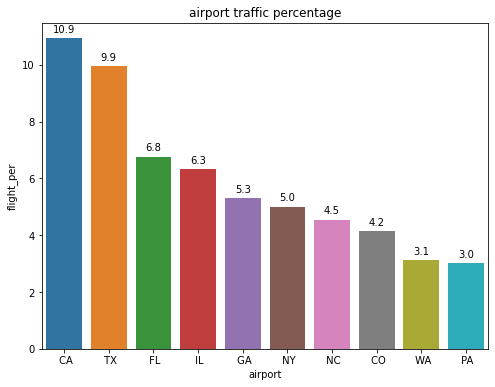

In [29]:
plt.figure(figsize=(8,6))
splot=sns.barplot(x='arr_state', y='flight_per', data=top10)

plt.xlabel('airport')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('airport traffic percentage')

plt.show()

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?  
##### A short-haul flight is one of up to 3 hours in duration. Medium-haul flights take 3-6 hours. A long-haul flight runs for 6-12 hours, whilst an ultra-long-haul flight is in the air for over 12 hours.

In [30]:
haul=pd.read_sql_query("select dep_time,air_time from flights where fl_date='2019-07-01';", con=con)

In [31]:
haul.to_csv('haul.csv')

In [32]:
haul.dropna(inplace=True)

In [135]:
haul.head()

,dep_time,air_time
5,845.0,95.0
6,704.0,69.0
7,1834.0,113.0
8,617.0,127.0
9,329.0,119.0


In [33]:
haul['air_time']=haul['air_time']/60

In [35]:
#assign different haul type based on air time
import numpy as np 
conditions=[(haul['air_time'].between(0,3)),(haul['air_time'].between(3,6)),(haul['air_time']>6)]
types=['low', 'medium', 'long']

haul['type']=np.select(conditions,types)

In [36]:
haul['dep_hour']=(haul['dep_time']/100).astype('int')

In [158]:
haul.head()

,dep_time,air_time,type,dep_hour
5,845.0,1.583333,low,8
6,704.0,1.150000,low,7
7,1834.0,1.883333,low,18
8,617.0,2.116667,low,6
9,329.0,1.983333,low,3


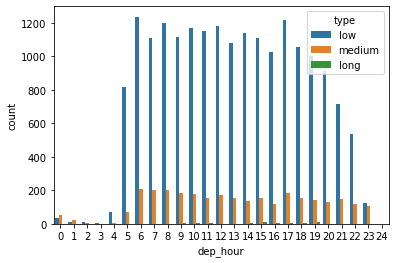

In [37]:
sns.countplot(data=haul, x='dep_hour', hue='type')

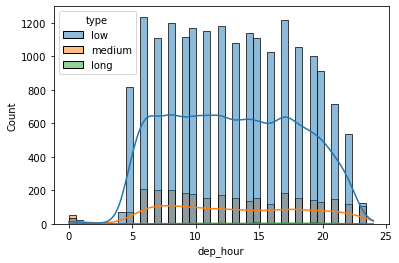

In [44]:
sns.histplot(x="dep_hour", hue="type", data=haul, kde=True)

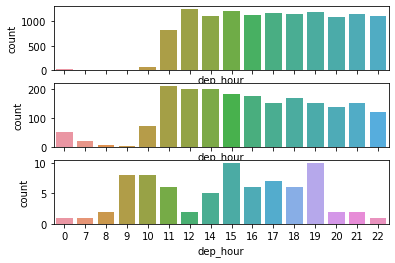

In [59]:
# for medium and long haul flight 
m=haul[haul.type=='medium']
l=haul[haul.type=='long']
s=haul[haul.type=='low']
fig,axs=plt.subplots(nrows=3, sharex=True)
sns.countplot(data=s, x='dep_hour', ax=axs[0])
sns.countplot(data=m, x='dep_hour', ax=axs[1])
sns.countplot(data=l, x='dep_hour', ax=axs[2]


### Task 9: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [ ]:
# extract airport flight data in july 2019

In [2]:
import numpy as np 
import pandas as pd 
pas=pd.read_csv('passengers.csv')

In [3]:
pas.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,1.0,1.0,162114.0,0.0,0.0,60673.0,0.0,964.0,143.0,123.0,...,US,United States,7,732,2,2015,5,2,G,DU
1,1.0,1.0,62789.0,0.0,0.0,14730.0,0.0,1416.0,210.0,188.0,...,US,United States,6,622,2,2015,5,3,G,DU
2,1.0,1.0,63074.0,0.0,0.0,34666.0,0.0,1619.0,251.0,224.0,...,US,United States,6,622,2,2015,5,4,G,DU
3,1.0,1.0,13500.0,0.0,0.0,5383.0,0.0,683.0,320.0,305.0,...,US,United States,1,110,2,2015,5,2,G,DU
4,1.0,1.0,63079.0,0.0,0.0,31127.0,0.0,508.0,135.0,118.0,...,US,United States,6,622,2,2015,5,2,G,DU


In [19]:
#extract passenger data for 2019 july
p=pas[(pas['year']==2019) &(pas['month']==7)]
pd=p[(p.dest_country=='US')]
po=p[(p.origin_country=='US')]
dep_airport=po.groupby(['origin'])['passengers'].sum().reset_index()
arr_airport=pd.groupby(['dest'])['passengers'].sum().reset_index()


In [24]:
arr_airport.isnull().sum()

dest          0
passengers    0
dtype: int64

In [21]:
#airport_traffic
airport_total=dep_airport.merge(arr_airport, left_on='origin', right_on='dest', how='outer')

In [22]:
airport_total.head()

,origin,passengers_x,dest,passengers_y
0,05A,5.0,05A,6.0
1,09A,3.0,09A,6.0
2,1B1,4.0,NaN,NaN
3,1G4,2176.0,1G4,2207.0
4,7AK,211.0,7AK,228.0


In [25]:
airport_total.fillna(0, inplace=True)

In [26]:
airport_total['total_traffic']=airport_total['passengers_x']+airport_total['passengers_y']

In [28]:
# based on the passengers number. the top 10 busist airport
airport_total.sort_values(by=['total_traffic'], ascending=False).head(10)

,origin,passengers_x,dest,passengers_y,total_traffic
63,ATL,4927710.0,ATL,5027887.0,9955597.0
453,LAX,4113920.0,LAX,4183997.0,8297917.0
601,ORD,3940863.0,ORD,3982939.0,7923802.0
198,DFW,3427639.0,DFW,3465403.0,6893042.0
197,DEN,3302731.0,DEN,3333649.0,6636380.0
385,JFK,2982798.0,JFK,3008041.0,5990839.0
735,SFO,2681027.0,SFO,2805581.0,5486608.0
732,SEA,2529386.0,SEA,2571977.0,5101363.0
495,MCO,2194938.0,MCO,2268324.0,4463262.0
451,LAS,2174255.0,LAS,2178227.0,4352482.0


In [75]:
p=['ATL','LAX', 'ORD', 'DFW', 'DEN', 'JFK','SFO','SEA','MCO','LAS']

In [61]:
# based on flights data, extract the top 10 flights counts for the airport in 2019 July
df_airport=pd.read_sql_query("Select fl_date,origin,dest from flights where fl_date between '2019-07-01' and '2019-07-31';", con=con)

In [63]:
df_airport.head()

,fl_date,origin,dest
0,2019-07-04,DCA,BHM
1,2019-07-02,ORD,CAE
2,2019-07-02,SMF,ONT
3,2019-07-01,CAE,CLT
4,2019-07-01,BGR,DCA


In [62]:
df_airport.to_csv('df_airport.csv')

In [64]:
dep_count=df_airport.groupby(['origin']).count().reset_index()
arr_count=df_airport.groupby(['dest']).count().reset_index()

In [65]:
dep_count.head()

,origin,fl_date,dest
0,ABE,660,660
1,ABI,208,208
2,ABQ,2360,2360
3,ABR,62,62
4,ABY,84,84


In [66]:
arr_count.head()

,dest,fl_date,origin
0,ABE,658,658
1,ABI,208,208
2,ABQ,2359,2359
3,ABR,62,62
4,ABY,84,84


In [67]:
dep_count.drop('fl_date', axis=1, inplace=True)

In [68]:
arr_count.drop('fl_date', axis=1, inplace=True)

In [69]:
total=dep_count.merge(arr_count, left_on='origin', right_on='dest', how='outer')

In [70]:
total.tail()


,origin_x,dest_x,dest_y,origin_y
366,WYS,65,WYS,65
367,XNA,1372,XNA,1372
368,YAK,62,YAK,62
369,YKM,109,YKM,109
370,YUM,151,YUM,151


In [72]:
total['total_flights']=total['dest_x']+total['origin_y']

In [73]:
total.sort_values(by=['total_flights'], ascending=False).head(10)

,origin_x,dest_x,dest_y,origin_y,total_flights
256,ORD,35771,ORD,35771,71542
22,ATL,35395,ATL,35393,70788
95,DFW,27328,DFW,27331,54659
94,DEN,26616,DEN,26622,53238
195,LAX,22440,LAX,22439,44879
74,CLT,21703,CLT,21704,43407
319,SEA,18174,SEA,18173,36347
321,SFO,15965,SFO,15965,31930
103,DTW,15695,DTW,15692,31387
169,IAH,15358,IAH,15351,30709


In [76]:
t=total.sort_values(by=['total_flights'], ascending=False).head(10)['origin_x'].values

In [77]:
print(f'The top 10 businest airport based on passengers are {p}')
print(f'The top 10 businest airport based on traffics are {t}')

The top 10 businest airport based on passengers are ['ATL', 'LAX', 'ORD', 'DFW', 'DEN', 'JFK', 'SFO', 'SEA', 'MCO', 'LAS']
The top 10 businest airport based on traffics are ['ORD' 'ATL' 'DFW' 'DEN' 'LAX' 'CLT' 'SEA' 'SFO' 'DTW' 'IAH']


### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
Is this higher for the airlines with bigger average delays? Data are extracted from the passenger table and fuel table and merged back with the flight table for comparison. It is not conclusive that the bigger flight delays lead to bigger fuel comsumption

In [148]:
#number of passengers 
passenger=pd.read_csv('passengers.csv', usecols=['passengers','unique_carrier','carrier_name', 'unique_carrier_name', 'month','year', 'origin_country', 'dest_country'], skiprows=lambda i: i%100!=0)

In [149]:
passenger.head()

,passengers,unique_carrier,unique_carrier_name,carrier_name,origin_country,dest_country,year,month
0,0.0,FX,Federal Express Corporation,Federal Express Corporation,US,US,2015,5
1,8.0,MW,"Mokulele Flight Services, Inc.","Mokulele Flight Services, Inc.",US,US,2015,5
2,158.0,SY,Sun Country Airlines d/b/a MN Airlines,Sun Country Airlines d/b/a MN Airlines,US,US,2015,5
3,0.0,OO,SkyWest Airlines Inc.,SkyWest Airlines Inc.,US,US,2015,6
4,1.0,OO,SkyWest Airlines Inc.,SkyWest Airlines Inc.,US,US,2015,6


In [150]:
#only include the rows of passengers >0
d_pas=passenger[(passenger.passengers>0) & (passenger.year==2019)]
d_dep=d_pas[(d_pas.origin_country=='US')]
d_des=d_pas[(d_pas.dest_country=='US')]
d_dep['unique_carrier_name'].value_counts()

United Air Lines Inc.                  364
Southwest Airlines Co.                 352
Delta Air Lines Inc.                   333
SkyWest Airlines Inc.                  285
American Airlines Inc.                 264
                                      ... 
Tap-Portuguese Airlines                  1
Air Charter, Inc d/b/a Air Flamenco      1
Virgin Atlantic Airways                  1
KaiserAir, Inc.                          1
Taca Peru                                1
Name: unique_carrier_name, Length: 150, dtype: int64

In [151]:
# calculate the monthly passenger count each carrier
carr=d_pas.groupby(['unique_carrier', 'month']).agg({'passengers': ['sum', 'mean']}).reset_index()
carr.columns=["_".join(x) for x in carr.columns.ravel()]

In [152]:
carr

,unique_carrier_,month_,passengers_sum,passengers_mean
0,02Q,5,22.0,22.000000
1,02Q,11,261.0,261.000000
2,04Q,1,6.0,6.000000
3,04Q,2,2.0,2.000000
4,04Q,3,6.0,3.000000
...,...,...,...,...
885,ZW,8,2510.0,2510.000000
886,ZW,9,4720.0,1573.333333
887,ZW,10,6075.0,2025.000000
888,ZW,11,4112.0,2056.000000


In [153]:
car_month=carr.groupby('unique_carrier_')['passengers_mean'].mean().reset_index()

In [154]:
car_month

,unique_carrier_,passengers_mean
0,02Q,141.500000
1,04Q,5.388889
2,07Q,129.000000
3,09Q,747.000000
4,0WQ,4.000000
...,...,...
179,YR,437.750000
180,YV,2896.127778
181,YX,1561.941509
182,Z3,5.000000


In [155]:
# monthly carrier average passengers number
car_month.sort_values(by='passengers_mean',ascending=False).head(10)

,unique_carrier_,passengers_mean
99,HA,20248.416667
157,SU,15467.000000
129,LY,13126.000000
89,EY,11952.000000
78,D8,10570.000000
55,AR,10324.000000
134,MU,9460.000000
141,OZ,9112.000000
49,AD,8509.750000
161,TK,8505.750000


In [156]:
l1=['F9', 'G4', 'AS', 'DL', 'WN', 'UA', 'AA', 'B6', 'HA', 'NK', 'VX']
l2=d_pas['unique_carrier'].values

In [78]:
#carrier=pd.read_sql_query("Select fl_date, mkt_unique_carrier,distance, arr_delay from flights where arr_delay is not null order by random() limit 1000000;", con=con)

In [79]:
#carrier.to_csv('carrier.csv')

In [161]:
carrier=pd.read_csv('carrier.csv')

In [168]:
carrier.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,distance,arr_delay
0,0,2019-11-10,F9,1053.0,-3.0
1,1,2018-07-22,G4,850.0,-1.0
2,2,2019-12-17,AS,748.0,3.0
3,3,2019-12-04,DL,155.0,18.0
4,4,2018-12-22,WN,612.0,2.0


In [169]:
carrier['fl_date'] = pd.to_datetime(carrier['fl_date'])

In [166]:
carrier.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,distance,arr_delay
0,0,2019-11-10,F9,1053.0,-3.0
1,1,2018-07-22,G4,850.0,-1.0
2,2,2019-12-17,AS,748.0,3.0
3,3,2019-12-04,DL,155.0,18.0
4,4,2018-12-22,WN,612.0,2.0


In [251]:
carrier.dtypes

Unnamed: 0                     int64
fl_date               datetime64[ns]
mkt_unique_carrier            object
distance                     float64
arr_delay                    float64
dtype: object

In [170]:
carrier['year']=carrier['fl_date'].dt.year
carrier['month']=carrier['fl_date'].dt.month

In [163]:
carrier.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,distance,arr_delay
0,0,2019-11-10,F9,1053.0,-3.0
1,1,2018-07-22,G4,850.0,-1.0
2,2,2019-12-17,AS,748.0,3.0
3,3,2019-12-04,DL,155.0,18.0
4,4,2018-12-22,WN,612.0,2.0


In [171]:
car=carrier[carrier['year']==2019]

In [172]:
# distance exploration
distance=car.groupby(['mkt_unique_carrier', 'month']).agg({'distance':['mean', 'sum']}).reset_index()
distance.columns=["_".join(x) for x in distance.columns.ravel()]

In [257]:
distance.head()

,mkt_unique_carrier_,month_,distance_mean,distance_sum
0,AA,1,690.174004,7226812.0
1,AA,2,710.731776,6786067.0
2,AA,3,694.224747,7759350.0
3,AA,4,674.271452,7111541.0
4,AA,5,691.664948,7916797.0


In [173]:
# different carrier distance mean month coverage:
dis_month=distance.groupby('mkt_unique_carrier_')['distance_sum'].mean().reset_index()

In [259]:
dis_month

,mkt_unique_carrier_,distance_sum
0,AA,7.587162e+06
1,AS,2.273823e+06
2,B6,1.725631e+06
3,DL,6.565683e+06
4,F9,7.202128e+05
5,G4,4.885311e+05
6,HA,3.567220e+05
7,NK,1.054099e+06
8,UA,6.498944e+06
9,WN,5.271717e+06


In [174]:
#top10 distance carrier
dis10=dis_month.sort_values(by='distance_sum', ascending=False).head(10)
dis10

,mkt_unique_carrier_,distance_sum
0,AA,7.587162e+06
3,DL,6.565683e+06
8,UA,6.498944e+06
9,WN,5.271717e+06
1,AS,2.273823e+06
2,B6,1.725631e+06
7,NK,1.054099e+06
4,F9,7.202128e+05
5,G4,4.885311e+05
6,HA,3.567220e+05


In [175]:
#different monthly delay by carrier
df=carrier[(carrier.arr_delay>0) & (carrier.year==2019)]
dc=df.groupby(['mkt_unique_carrier', 'month']).agg({'arr_delay':['count', 'mean', 'sum']}).reset_index()
dc.columns=["_".join(x) for x in dc.columns.ravel()]


In [176]:
dc

,mkt_unique_carrier_,month_,arr_delay_count,arr_delay_mean,arr_delay_sum
0,AA,1,3920,35.743367,140114.0
1,AA,2,3910,42.542455,166341.0
2,AA,3,3944,34.143002,134660.0
3,AA,4,3750,42.741867,160282.0
4,AA,5,4628,44.319360,205110.0
...,...,...,...,...,...
115,WN,8,2426,29.553586,71697.0
116,WN,9,1709,23.273259,39774.0
117,WN,10,2322,25.931955,60214.0
118,WN,11,2067,24.177068,49974.0


In [177]:
# mean_delay_time for different carrier
dm=dc.groupby(['mkt_unique_carrier_'])['arr_delay_mean'].mean().reset_index()

In [178]:
# top 10 carrier with hgihest average delay
dm10=dm.sort_values(by='arr_delay_mean', ascending=False).head(10)
top10delay=dm10['mkt_unique_carrier_'].values

In [99]:
dc.head()

,mkt_unique_carrier,month,total_delays
0,AA,1,7523
1,AA,2,7337
2,AA,3,7185
3,AA,4,7140
4,AA,5,8532


In [179]:
# fuel consumption 
fuel=pd.read_csv('fuel.csv')

In [169]:
fuel.columns

Index(['Unnamed: 0', 'month', 'airline_id', 'unique_carrier', 'carrier',
       'carrier_name', 'carrier_group_new', 'sdomt_gallons', 'satl_gallons',
       'spac_gallons', 'slat_gallons', 'sint_gallons', 'ts_gallons',
       'tdomt_gallons', 'tint_gallons', 'total_gallons', 'sdomt_cost',
       'satl_cost', 'spac_cost', 'slat_cost', 'sint_cost', 'ts_cost',
       'tdomt_cost', 'tint_cost', 'total_cost', 'year'],
      dtype='object')

In [180]:
fuel=fuel[['month', 'unique_carrier','total_gallons','year']]

In [171]:
fuel.head()

,month,unique_carrier,total_gallons,year
0,1,NaN,3000.0,2016
1,1,0WQ,210112.0,2016
2,1,23Q,0.0,2016
3,1,27Q,0.0,2016
4,1,5V,284362.0,2016


In [181]:
fuel=fuel[fuel.year==2019]
fuel.head()

,month,unique_carrier,total_gallons,year
1977,1,09Q,1235210.0,2019
1978,1,0WQ,0.0,2019
1979,1,1BQ,60821.0,2019
1980,1,27Q,0.0,2019
1981,1,2HQ,410186.0,2019


In [182]:
df_fuel=fuel.groupby(['unique_carrier', 'month']).agg({'total_gallons':['sum', 'mean']}).reset_index()
df_fuel.columns=["_".join(x) for x in df_fuel.columns.ravel()]

In [183]:
fuel_month=df_fuel.groupby('unique_carrier_')['total_gallons_sum'].mean().reset_index()

In [271]:
#fuel_month

In [184]:
# merge two tables fuel_month and carrier_month for the average gas /average person
fuel_pass=pd.merge(car_month, fuel_month, on='unique_carrier_', how='inner')
fuel_pass_dis=dis_month.merge(fuel_pass, left_on='mkt_unique_carrier_', right_on='unique_carrier_', how='left')

In [185]:
fuel_pass_dis.head()

,mkt_unique_carrier_,distance_sum,unique_carrier_,passengers_mean,total_gallons_sum
0,AA,7.587162e+06,AA,5546.623803,3.079852e+08
1,AS,2.273823e+06,AS,2943.808598,6.101888e+07
2,B6,1.725631e+06,B6,5402.078367,7.403417e+07
3,DL,6.565683e+06,DL,3931.365915,3.087060e+08
4,F9,7.202128e+05,F9,1493.197419,2.353042e+07


In [187]:
fuel_pass_dis['gas_per_person_km']=round(fuel_pass_dis['total_gallons_sum']/(fuel_pass_dis['passengers_mean']*fuel_pass_dis['distance_sum']),2)
fuel_pass_dis

,mkt_unique_carrier_,distance_sum,unique_carrier_,passengers_mean,total_gallons_sum,gas_per_person_km
0,AA,7.587162e+06,AA,5546.623803,3.079852e+08,0.01
1,AS,2.273823e+06,AS,2943.808598,6.101888e+07,0.01
2,B6,1.725631e+06,B6,5402.078367,7.403417e+07,0.01
3,DL,6.565683e+06,DL,3931.365915,3.087060e+08,0.01
4,F9,7.202128e+05,F9,1493.197419,2.353042e+07,0.02
5,G4,4.885311e+05,G4,1202.746207,1.655339e+07,0.03
6,HA,3.567220e+05,HA,20248.416667,2.239415e+07,0.00
7,NK,1.054099e+06,NK,2645.977391,3.937194e+07,0.01
8,UA,6.498944e+06,UA,2637.317181,2.975601e+08,0.02
9,WN,5.271717e+06,WN,4306.029671,1.723195e+08,0.01


In [278]:
f10=fuel_pass_dis.sort_values(by=['gas_per_person_km'], ascending=False).head(10)

In [279]:
top10gas=f10['mkt_unique_carrier_'].values

In [281]:
print(f'The top10 carriers delays are {top10delay}')
print(f'The top10 gas consumption carrierss are {top10gas}')

The top10 airport delays are ['B6' 'UA' 'F9' 'DL' 'AA' 'NK' 'G4' 'WN' 'AS' 'HA']
The top10 gas consumption carrierss are ['G4' 'F9' 'UA' 'AA' 'AS' 'B6' 'DL' 'NK' 'WN' 'HA']
